# Mean Squared Error (MSE) as Cost Function

Instead of using an algebraic cost function, we will use the Mean Square Error (MSE) as the cost function. The MSE will be derived from attempting to fit a linear fit to real data - rather than an algebraic expression.

## Mean Square Error - Cost Function

The Residual Sum of Squares (RSS) is expressed as:

$$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

The MSE is then:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

or:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^i $$

where $\hat{y}$ is the estimate of $y$ using the estimated or predicted parameters from the gradient descent algorithm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Make sample data
xData = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
yData = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)


In [4]:
# Quick linear regression using Sklearn
regression = LinearRegression()
regression.fit(xData, yData)
print("Theta 0 : ", regression.intercept_[0])
print("Theta 1 : ", regression.coef_[0][0])

Theta 0 :  0.8475351486029545
Theta 1 :  1.2227264637835913


## Plot Data and Linear Regression Line

Text(0, 0.5, 'y values')

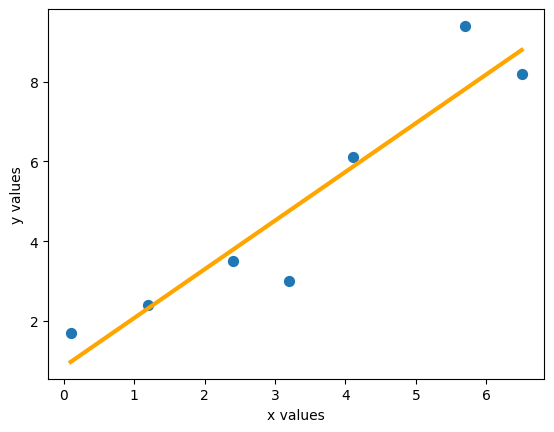

In [5]:
plt.scatter(xData, yData, s=50)
plt.plot(xData, regression.predict(xData), color='orange', linewidth=3)
plt.xlabel("x values")
plt.ylabel("y values")

### Compare MSE Calculations - Manual v scikit-learn

To see how finding the MSE manually compares to the scikit-learn calculation, we use the optimal linear regression parameters to calculate our y estimates, then create a Python function to calculate the MSE from the actual data and the estimates.

In [6]:
# Find MSE based on xData and scikit-learn linear regression parameters:
y_hat = 0.8475351486029545 + 1.2227264637835913 * xData
print("Estimated y values: \n", y_hat)
print("Actual y values: ", yData)

Estimated y values: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual y values:  [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [7]:
def mse(y, y_hat):
    # mse_calc = 1/7 * sum((y - y_hat)**2)
    # mse_calc = 1/y.size * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

print("Calculated MSE  : ", mse(yData, y_hat))
print("scikit-lean MSE : ", mean_squared_error(yData, regression.predict(xData)))

Calculated MSE  :  [0.94796558]
scikit-lean MSE :  0.9479655759794577


## 3D Plot of the MSE Cost Function

### Make Data for Thetas

In [8]:
number_of_thetas = 200
theta_0 = np.linspace(start=-1, stop=3, num=number_of_thetas)
theta_1 = np.linspace(start=-1, stop=3, num=number_of_thetas)
plot_theta_0, plot_theta_1 = np.meshgrid(theta_0, theta_1)

### Calculate the MSE

In [9]:
plot_cost = np.zeros((number_of_thetas, number_of_thetas))

for i in range(number_of_thetas):
    for j in range(number_of_thetas):
        y_hat = plot_theta_0[i][j] + plot_theta_1[i][j] * xData
        plot_cost[i][j] = mse(yData, y_hat)

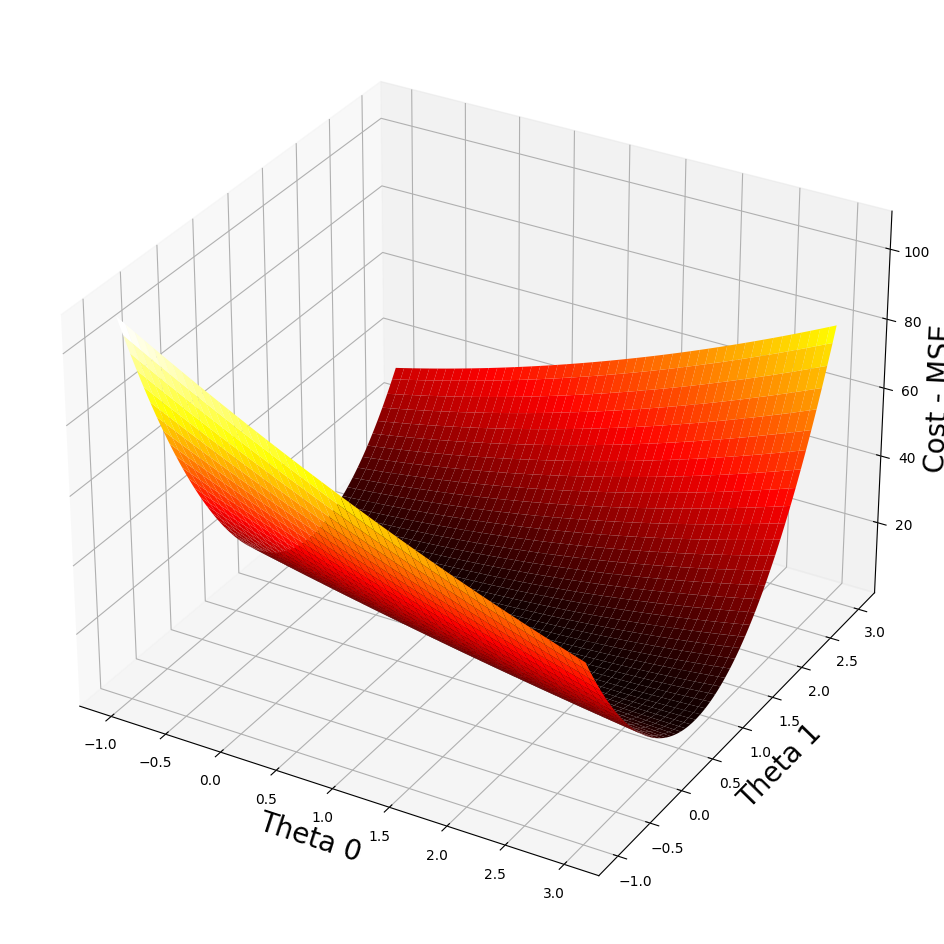

In [11]:
# Plot the MSE
plt.figure(figsize=[16, 12])
axes = plt.subplot(projection='3d')

axes.set_xlabel("Theta 0", fontsize=20)
axes.set_ylabel("Theta 1", fontsize=20)
axes.set_zlabel("Cost - MSE", fontsize=20)

axes.plot_surface(plot_theta_0, plot_theta_1, plot_cost, cmap=cm.hot)

In [16]:
print("Minimum value of plot_cost: ", plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print("Minimum occurs at (i,j): ", ij_min)

Minimum value of plot_cost:  0.9483826526747164
Minimum occurs at (i,j):  (111, 91)
